# Fetal Health Classification Data Analysis

## Overview

As medical technology advances, the rate of preventable child mortality decreases.  Lowering child mortality rates has become a key goal in advancing any society and a key in human progress as a whole. While there are many advnacments that have improved the mortality rate, not all of these practices are globaly available.  In order to improve mortality rates in cost effective and readily available solutions need to be applied and perfected. 

One such cost effective and relativly simple method would be the use of Cardiotocograms (CTG).  The CTG is a non-invasive fetal moniter which is used to asses fetal health.  The CTG is used to detect fetal heart rate(FHR), uterin contractions, fetal movement, and sudden changes in heart rate.  Extreme changes to the FHR results in surgical intervention through the use of cesarian delivery(C-section).  Currently, doctors rely on a visual analyisis of the CTG leading to erroneous interpretations of the exam.  Minute changes which may be extremely detrimental to fetal health may also not be visable to the naked eye.  Conversley some observable changes in fetal heart rate may appear to be fetal distress, but are just a response to other factors like uterine contractions. Opting to preform a C-section increases the chances of mortality not only for the child but also the the mother. For these reasons visual analysis of a CTG exam is limited by human error and cannot diffinitavly detect fetal distress. 

In order to improve diagnosis of fetal distress with a CTG and improve the mortality rate, the use of machine learning algorithms becomes a viable option.  A well trained model will be able to identify which variable changes to the FHR have the greatest effect on fetal health.  To lower the overal risk of child mortality a ML model must not only be able to accuratly classify between normal and distressed fetal health, but be precise enough in its predictions to prevent any unecessary interventive surgical procedures.  

For our analysis of the we used a CTG exam dataset found on Kaggle from The Journal of Maternal-Fetal Medicine.  The dataset consisted of 2126 CTG exam records which were classified into three classes(normal,suspect,pathological).  In this initial analysis we decided to create a binary class of normal and distressed, combining the suspect and pathological classes into one class.

To address the issue of eliminating human error and erroneous surgical intervention, our goal of this analysis was to identify which key features played a role in determining the healthy or distressed classes, and to produce a highly precise model to eliminate unecessary C-sections.  To acheive these goals, we preformed an extensive exploritory data analysis, created baseline models and preformed hyperparameter tuning of models for both an experimental feature and unaltered CTG data set. Our final model had clear feature importance and the best evaluation metrics.  



## Read In Data

In [1]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 300)
% matplotlib inline

plt.style.use('seaborn')

In [2]:
import os
os.path.isfile('../Phase_3_Project/data.csv/fetal_health.csv')

True

In [3]:
#Read in UCI Heart Disiease Databasae
df = pd.read_csv('../Phase_3_Project/data.csv/fetal_health.csv')


In [4]:
#Check columns and rows
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0

## Data Cleaning

In [5]:
#Check for null Values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
#Check Shape of dataframe
df.shape

(2126, 22)

In [7]:
#Data types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

The dataframe had no missing values, and was 22 columns with 2126 rows.  The data type for each column was a float. 

In [8]:
#change any value of the target value above one to two, creating two target classes instead of three classes. 
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

In [9]:
df.fetal_health.value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

We decided to create a binary targert where the fetal health was either normal (1) or in distress (2).  

## EDA

In [10]:
# value counts for having heart disease or not
df['fetal_health'].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

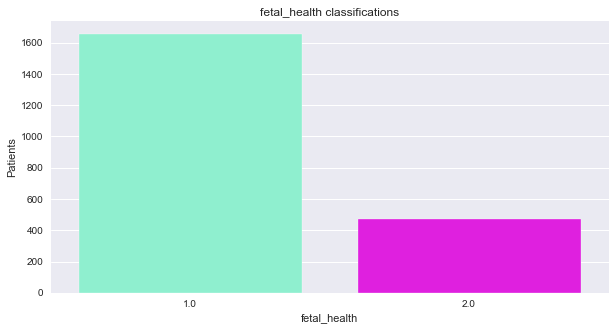

In [11]:
# Check the Distribution of target data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['fetal_health'], alpha = 1, palette= ['aquamarine','magenta','mediumblue'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

Here we created a visualization showing the distribution of samples that where classified as either healthy (1) or distressed (2).  There is a significant difference in the two sample sizes.  We will need to consider class imbalance in our modeling hyperpareters.  

In [12]:
#Train test split to create basline models for the unaltered dataset.
X = df.drop('fetal_health',axis=1)
y= df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
def evaluation(y_test, y_pred):
    print('Accuracy: '  + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
y_pred = knn.predict(X_test)
evaluation(y_test,y_pred)

Accuracy: 0.9210526315789473
Recall: 0.9682151589242054
F1 Score: 0.9496402877697842
Precision: 0.9317647058823529


In [16]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/heymanjake/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
y_pred = lr.predict(X_test)
evaluation(y_test, y_pred)

Accuracy: 0.8909774436090225
Recall: 0.9535452322738386
F1 Score: 0.9307875894988066
Precision: 0.9090909090909091


In [18]:
print(lr.coef_)

[[ 1.30243156e-01 -1.54091818e-01  1.14093673e+00 -2.21403797e-01
  -8.80380073e-02 -4.96586813e-04  3.63194864e-02  5.65533434e-02
  -1.15179779e+00  4.49200309e-02  7.72276498e-02 -3.42531299e-03
   2.08505304e-02  1.74252174e-02  7.77233146e-02  1.37420713e-01
  -1.20819823e-02 -6.49840876e-02 -8.66780394e-02  2.76640043e-02
   5.62882104e-01]]


In [19]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table

0     Coefs
0                                      baseline value  0.130243
1                                       accelerations -0.154092
2                                      fetal_movement  1.140937
3                                uterine_contractions -0.221404
4                                 light_decelerations -0.088038
5                                severe_decelerations -0.000497
6                            prolongued_decelerations  0.036319
7                     abnormal_short_term_variability  0.056553
8                mean_value_of_short_term_variability -1.151798
9   percentage_of_time_with_abnormal_long_term_var...  0.044920
10                mean_value_of_long_term_variability  0.077228
11                                    histogram_width -0.003425
12                                      histogram_min  0.020851
13                                      histogram_max  0.017425
14                          histogram_number_of_peaks  0.077723
15                         histogram_number_of_zeroes  0.137421
16                                     histogram_mode -0.012082
17                                     histogram_mean -0.064984
18                                   histogram_median -0.086678
19                                 histogram_variance  0.027664
20                                 histogram_tendency  0.562882

In [69]:
tree = DecisionTreeClassifier()

tree = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

evaluation(y_test, y_pred)

Accuracy: 0.924812030075188
Recall: 0.9437652811735942
F1 Score: 0.9507389162561578
Precision: 0.9578163771712159


In [70]:
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

evaluation(y_test, y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Accuracy: 0.9097744360902256
Recall: 0.9902200488997555
F1 Score: 0.944055944055944
Precision: 0.9020044543429844


In this step of our EDA we preformed four baseline models to guage how the existing data features preformed on their own.  A KNN classifier yeilded an accuracy of .92, a recall of .96 and a f1 score of .95.  A logistic regression classifier yeilded an accuracy of .89, a recall of .95 and a f1 score of .93.  A decision tree yeilded an accuracy of .92, a recall of .94 and a f1 score of .95.  A random forest classifier yeilded an accuracy of .9, a recall of .99 and an f1 score of .94.  Each of these baseline models preformed very well at predicting the target classes despite the apperent class imbalance.  Our further modeling will focus on identifying which features play a key roll in fetal health classification, and how we can fine tune the models to improve upon the models already good metric scores.

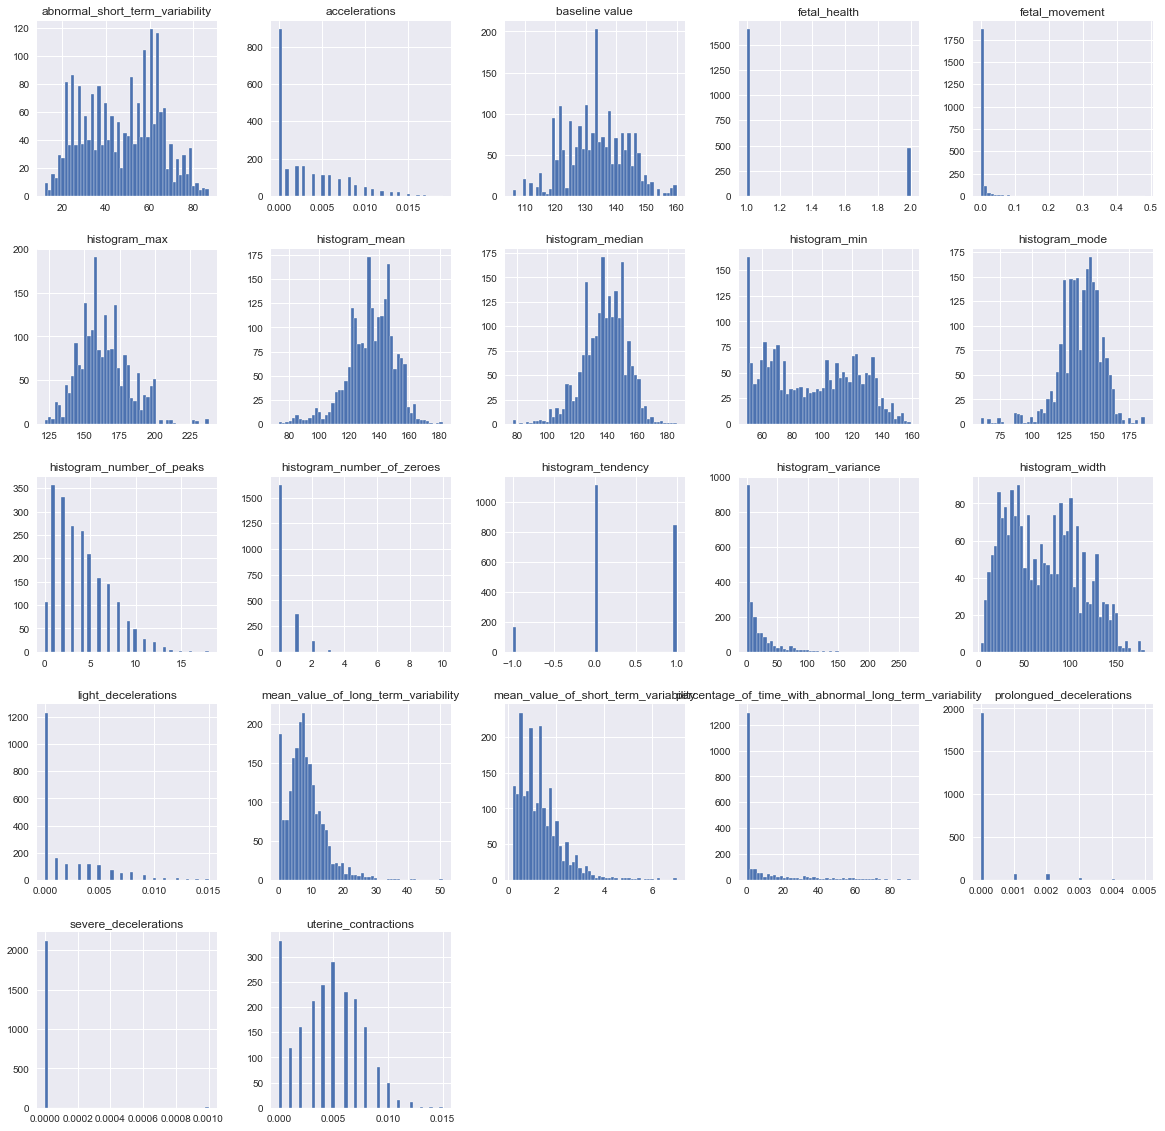

In [22]:
# Histogram of all featrues
df.hist(bins=50, figsize=(20,20))
plt.show()

We created a histogram of each feature to visualize the distribution of of each feature.  Certain features such as acceleration, light decelerations and fetal movement seem ideal for binning, while catagorical features like prolonged deceleration, severe deceleration and histogram tendancy seemed ideal for dummy catagories.  

In [23]:
#Check the statistical data of the features
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  \
count                                         2126.00000        
mean                                             9.84666        
std                                             18.39688        
min                                              0.00000        
25%                                              0.00000        
50%                                              0.00000        
75%                                             11.00000        
max                                             91.00000        

       mean_value_of_long_term_variability  histogram_width  histogram_min  \
count                          2126.000000      2126.000000    2126.000000   
mean                              8.187629        70.445908      93.579492   
std                               5.628247        38.955693      29.560212   
min                               0.000000         3.000000      50.000000   
25%                               4.600000        37.000000      67.000000   
50%                               7.400000        67.500000      93.000000   
75%                              10.800000       100.000000     120.000000   
max                              50.700000       180.000000     159.000000   

       histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
count    2126.000000                2126.000000                 2126.000000   
mean      164.025400                   4.068203                    0.323612   
std        17.944183                   2.949386                    0.706059   
min       122.000000                   0.000000                    0.000000   
25%       152.000000                   2.000000                    0.000000   
50%       162.000000                   3.000000                    0.000000   
75%       174.000000                  

In [24]:
#check feature corrolation 
df.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.251875   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.394760   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

In [25]:
#create dataframe of predictor variables
fetal_health_pred = df.drop('fetal_health', axis =1)

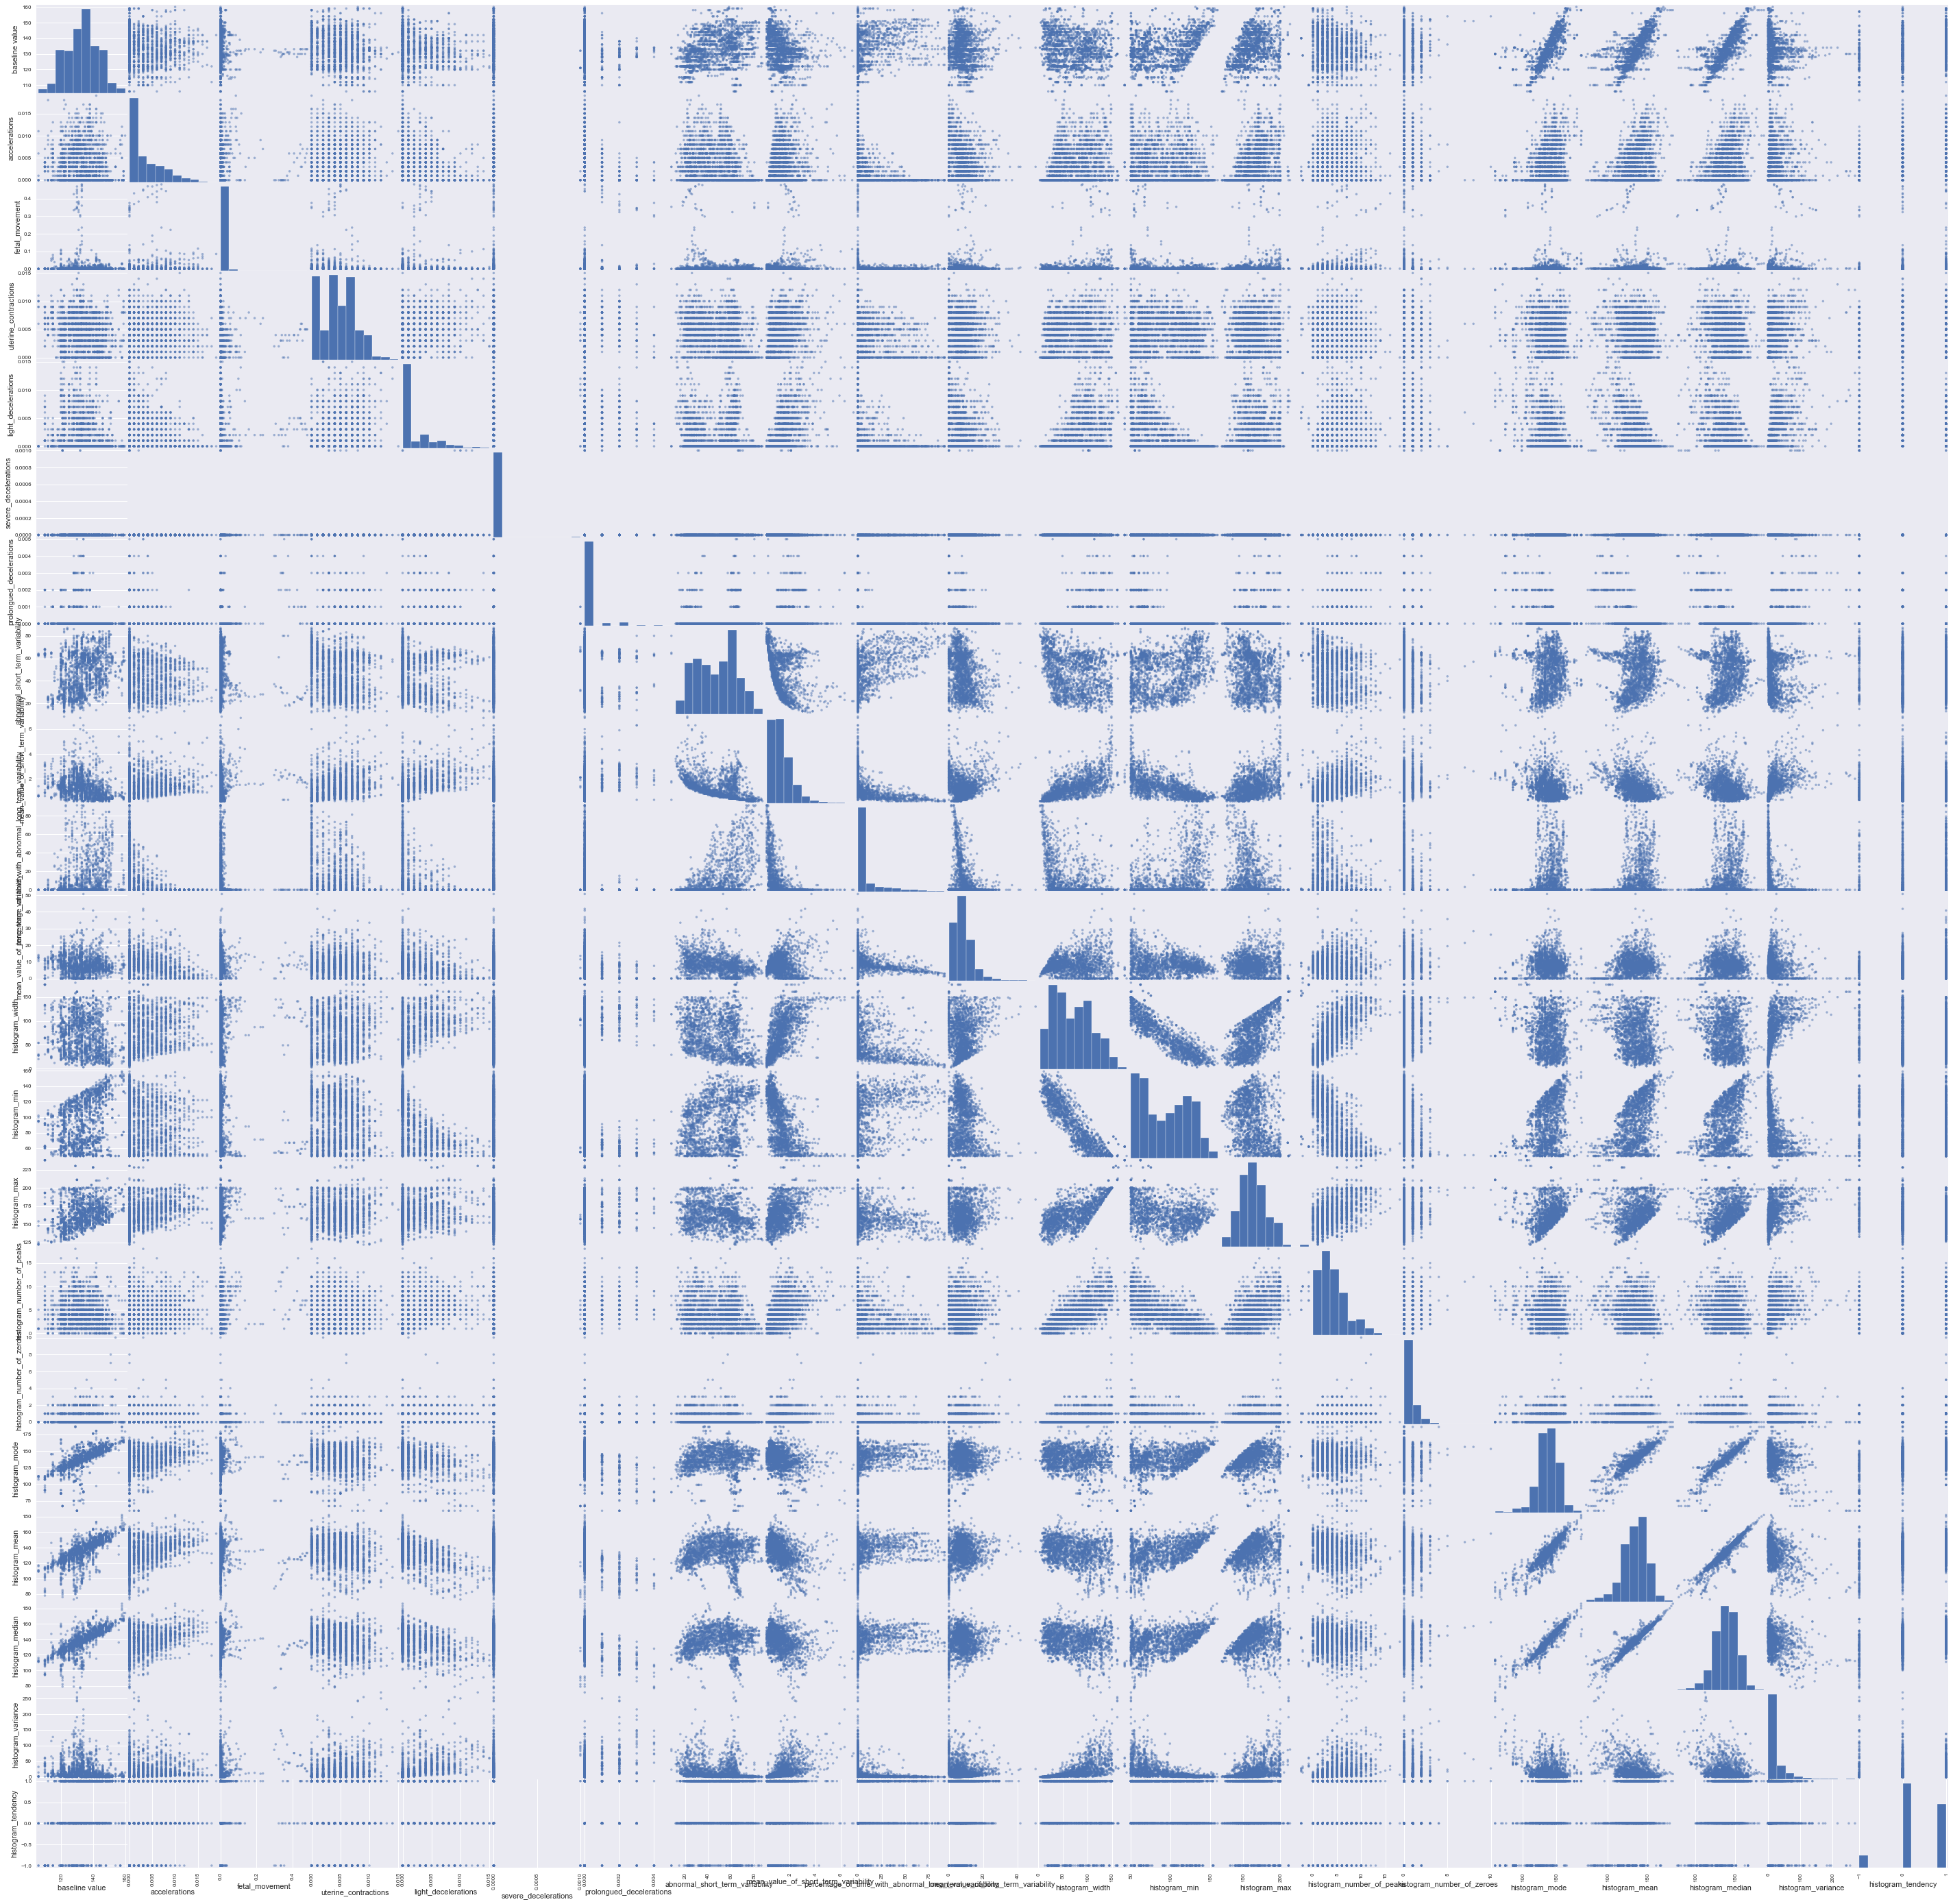

In [26]:
#plot a scatter matrix of predictor variable relationships
pd.plotting.scatter_matrix(fetal_health_pred,figsize= (50,50));
plt.show()

In [27]:
#check value counts of uterine_contractions
df.uterine_contractions.value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [28]:
df.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    60
64.0    58
63.0    58
        ..
83.0     4
14.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

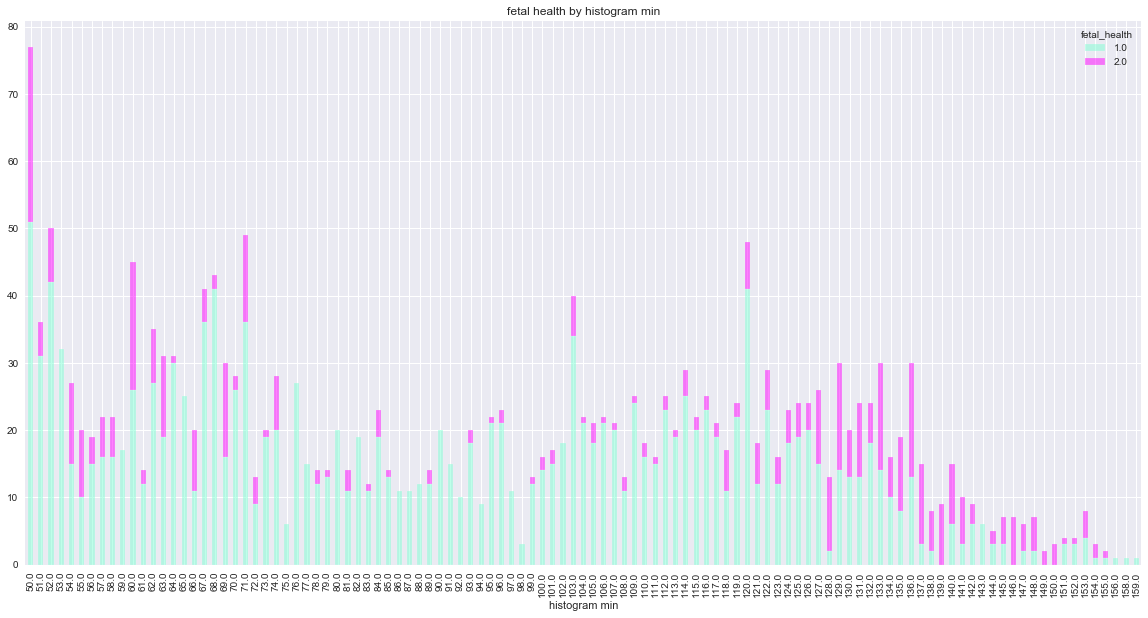

In [29]:
#Histogram showing the histogram distrubition values of minimum FHR by the three Classes
histogram_min = df.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram min',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram min')

plt.show()

In [30]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

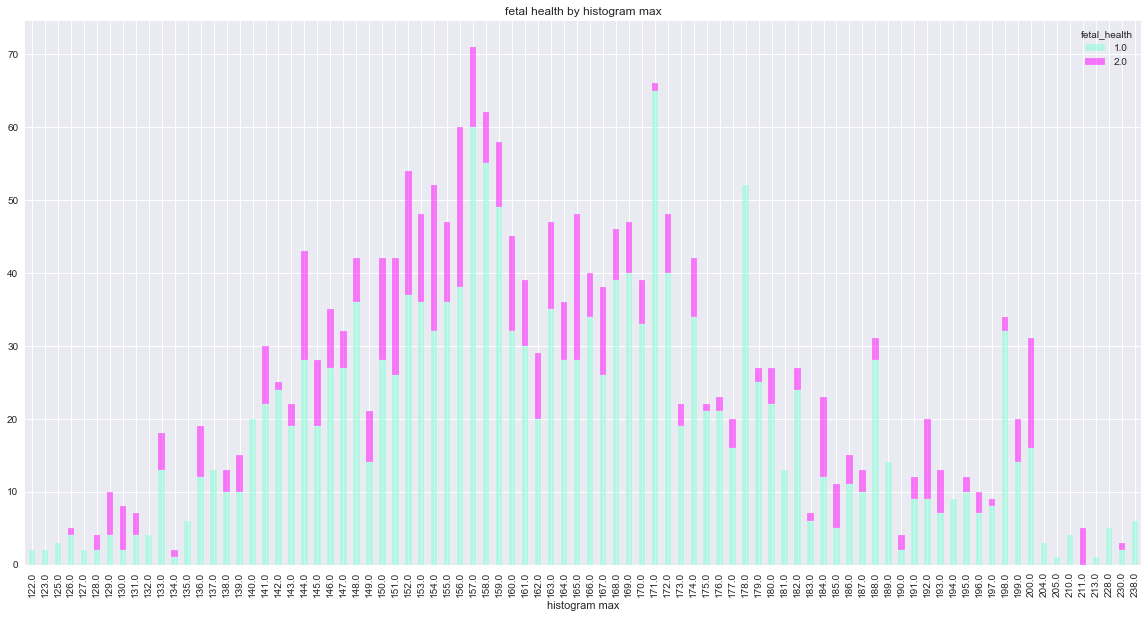

In [31]:
# #Histogram showing the histogram distribution values of maximum FHR by the three Classes
histogram_min = df.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram max',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram max')

plt.show()

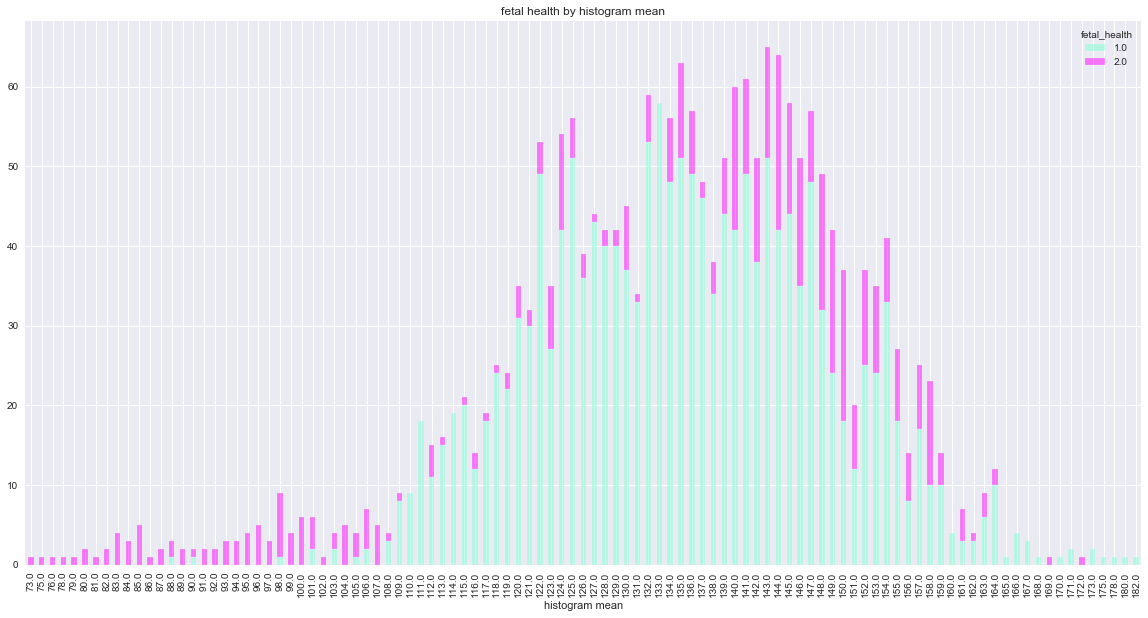

In [32]:
# #Histogram showing the histogram distribution values of average FHR by the three Classes
histogram_min = df.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram mean',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean')

plt.show()

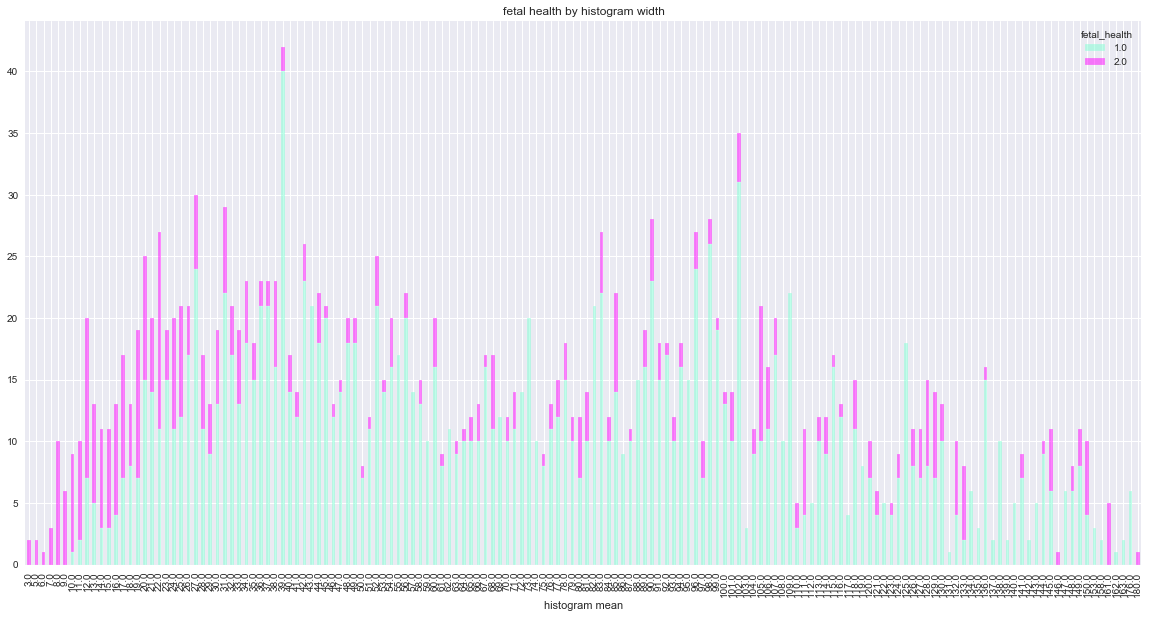

In [33]:
#
histogram_min = df.groupby(['histogram_width','fetal_health']).histogram_width.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       title = 'fetal health by histogram width',
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean')

plt.show()

In [34]:
df.head(1)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0            0.0             0.0                   0.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.0                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0

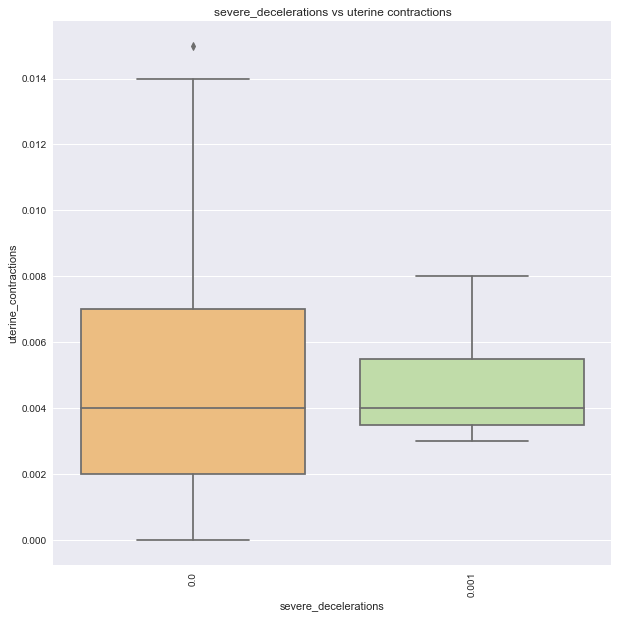

In [35]:
# Boxplot of uter
plt.figure(figsize = (10,10))
sns.boxplot(x = 'severe_decelerations', 
            y ='uterine_contractions',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs uterine contractions')
plt.xticks(rotation='vertical')
plt.show()

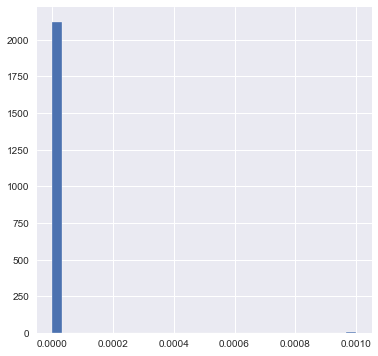

In [36]:
df.severe_decelerations.hist(bins=30,figsize=(6,6))

In [37]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

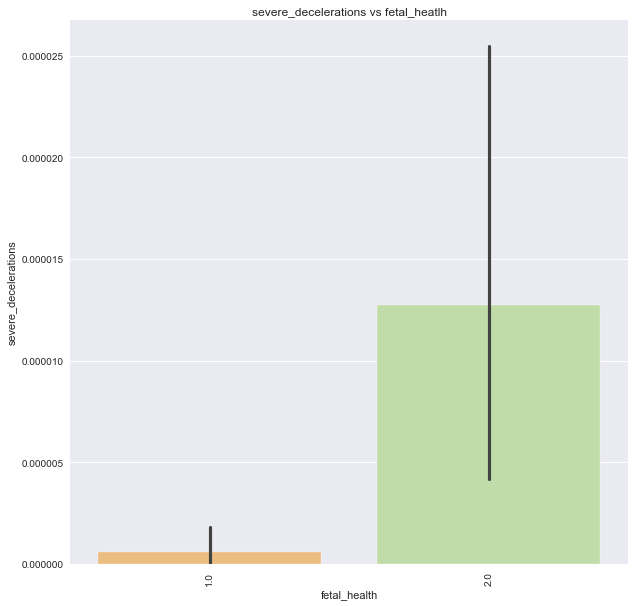

In [38]:
#boxplot of fetal health vs sever deceleration
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='severe_decelerations',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

- create 

## Feature Engineering

In [39]:
#create new column of contractions per minute
df['uterine_cont_per_min'] = df['uterine_contractions']*60

In [40]:
#check value counts of acceleration feature
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [41]:
df.accelerations.describe(include='catagory')

count    2126.000000
mean        0.003178
std         0.003866
min         0.000000
25%         0.000000
50%         0.002000
75%         0.006000
max         0.019000
Name: accelerations, dtype: float64

In [42]:
# bin accelerations by quantile
df['quantile_acceleration'] = pd.qcut(df['accelerations'],
                                     q=[0,.25,.75,1], labels = False,
                                     duplicates='drop')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                  0.00   
1                 0.0           1.0                  0.36   
2                 0.0           1.0                  0.48   
3                 1.0           1.0                  0.48   
4                 1.0           1.0                  0.48   

   quantile_acceleration  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [43]:
df.quantile_acceleration.value_counts()

0    1697
1     429
Name: quantile_acceleration, dtype: int64

In [44]:
df.light_decelerations.value_counts()

0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: light_decelerations, dtype: int64

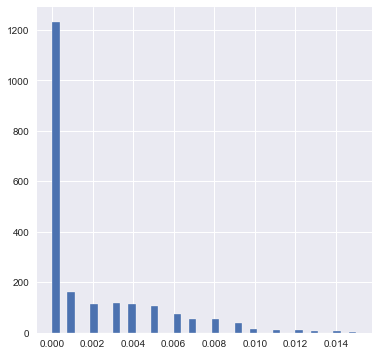

In [45]:
df.light_decelerations.hist(bins=40,figsize=(6,6))

In [46]:
df['total_change'] = ((df.accelerations + df.fetal_movement
                      + df.uterine_contractions + df.light_decelerations
                      + df.severe_decelerations) * df['baseline value'])

In [47]:
# bin light decelerations by quantile 
df['quantile_light_decelerations'] = pd.qcut(df['light_decelerations'],
                                     q=4,labels=False, duplicates='drop'
                                     )

In [48]:
df.quantile_light_decelerations.value_counts()

0    1627
1     499
Name: quantile_light_decelerations, dtype: int64

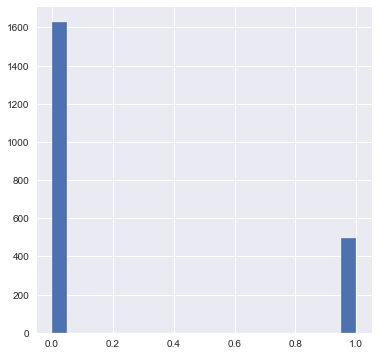

In [49]:
df.quantile_light_decelerations.hist(bins=20, figsize=(6,6))

In [50]:
df.histogram_mean.describe()

count    2126.000000
mean      134.610536
std        15.593596
min        73.000000
25%       125.000000
50%       136.000000
75%       145.000000
max       182.000000
Name: histogram_mean, dtype: float64

In [51]:
pd.qcut(df['histogram_mean'],q=4)

0       (136.0, 145.0]
1       (125.0, 136.0]
2       (125.0, 136.0]
3       (125.0, 136.0]
4       (125.0, 136.0]
             ...      
2121    (145.0, 182.0]
2122    (145.0, 182.0]
2123    (145.0, 182.0]
2124    (145.0, 182.0]
2125    (136.0, 145.0]
Name: histogram_mean, Length: 2126, dtype: category
Categories (4, interval[float64]): [(72.999, 125.0] < (125.0, 136.0] < (136.0, 145.0] < (145.0, 182.0]]

In [52]:
df['quantile_hist_mean'] = pd.qcut(df['histogram_mean'],q=7,labels=False)

In [53]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                  0.00   
1                 0.0           1.0                  0.36   
2                 0.0           1.0                  0.48   
3                 1.0           1.0                  0.48   
4                 1.0           1.0                  0.48   

   quantile_acceleration  total_change  quantile_light_decelerations  \
0                      0         0.000                             0   
1                      0         1.980                             0   
2                      0         1.862                             0   
3                      0         1.876                             0   
4                      1         1.980                             0   

   quantile_hist_mean  
0                   3  
1                   3  
2                   3  
3                   3  
4                   3

In [54]:
df.quantile_hist_mean.value_counts()

0    333
3    313
1    313
4    301
5    294
6    292
2    280
Name: quantile_hist_mean, dtype: int64

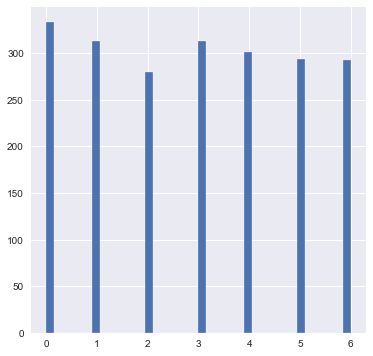

In [55]:
df.quantile_hist_mean.hist(bins=40,figsize=(6,6))

In [56]:
df.head(1)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0            0.0             0.0                   0.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.0                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                   0.0   

   quantile_acceleration  total_change  quantile_light_decelerations  \
0                      0           0.0                             0   

   quantile_hist_mean  
0                   3

In [57]:
df['sqrt_total_change'] = (df.accelerations + df.fetal_movement
                           + df.uterine_contractions + df.light_decelerations
                           + df.severe_decelerations+ df.prolongued_decelerations)**.5

In [58]:
df.head(1)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0            0.0             0.0                   0.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.0                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                   0.0   

   quantile_acceleration  total_change  quantile_light_decelerations  \
0                      0           0.0                             0   

   quantile_hist_mean  sqrt_total_change  
0                   3                0.0

In [59]:
df.sqrt_total_change.value_counts()

0.083666    118
0.089443    110
0.077460    109
0.109545    104
0.070711    101
           ... 
0.628490      1
0.242899      1
0.681909      1
0.244949      1
0.346410      1
Name: sqrt_total_change, Length: 137, dtype: int64

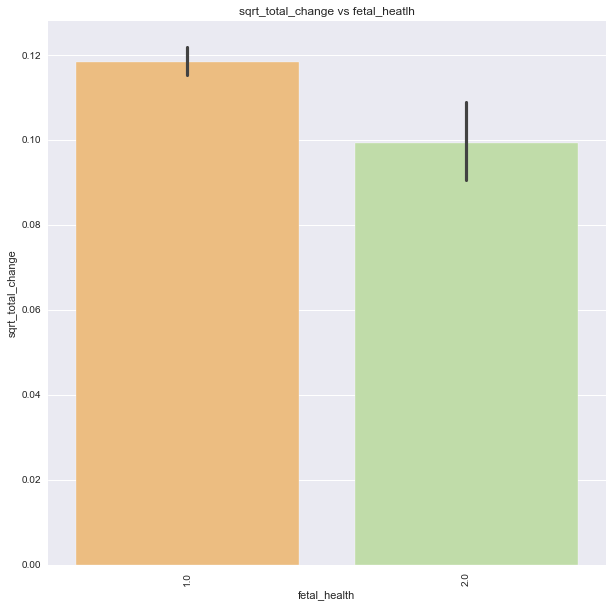

In [60]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='sqrt_total_change',
            data = df, 
            palette = 'Spectral').set_title('sqrt_total_change vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df.head(1)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0            0.0             0.0                   0.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.0                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   

   histogram_tendency  fetal_health  uterine_cont_per_min  \
0                 1.0           2.0                   0.0   

   quantile_acceleration  total_change  quantile_light_decelerations  \
0                      0           0.0                             0   

   quantile_hist_mean  sqrt_total_change  
0                   3                0.0

In [62]:
zeroes_dummie = pd.get_dummies(df.histogram_number_of_zeroes,prefix='hist_zeros',drop_first=True)
tendancy_dummie = pd.get_dummies(df.histogram_tendency,prefix='hist_tendancy',drop_first=True)
severe_dec_dummie = pd.get_dummies(df.severe_decelerations,prefix='sev_decel',drop_first=True)
quant_acc_dummie = pd.get_dummies(df.quantile_acceleration, prefix='quant_acc',drop_first=True)
quant_light_dec_dummie = pd.get_dummies(df.quantile_light_decelerations,prefix='quant_light_dec',drop_first=True)
quant_hist_mean_dummie = pd.get_dummies(df.quantile_hist_mean,prefix='quant_hist_mean',drop_first=True)

dummie_data = pd.concat([zeroes_dummie,tendancy_dummie,
                         severe_dec_dummie,quant_acc_dummie,
                         quant_light_dec_dummie,quant_hist_mean_dummie],axis=1)
dummie_data.head()

hist_zeros_1.0  hist_zeros_2.0  hist_zeros_3.0  hist_zeros_4.0  \
0               0               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   hist_zeros_5.0  hist_zeros_7.0  hist_zeros_8.0  hist_zeros_10.0  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   hist_tendancy_0.0  hist_tendancy_1.0  sev_decel_0.001  quant_acc_1  \
0                  0                  1                0            0   
1                  1                  0                0            0   
2                  1                  0                0            0   
3                  0                  1                0            0   
4                  0                  1                0            1   

   quant_light_dec_1  quant_hist_mean_1  quant_hist_mean_2  quant_hist_mean_3  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   quant_hist_mean_4  quant_hist_mean_5  quant_hist_mean_6  
0                  0                  0                  0  
1                  0                  0                  0  
2                  0                  0                  0  
3                  0                  0                  0  
4                  0                  0                  0

In [63]:
df_exp = df.drop(['histogram_number_of_zeroes','histogram_tendency',
                  'severe_decelerations','quantile_acceleration',
                  'quantile_light_decelerations','quantile_hist_mean'],axis=1)

In [64]:
Experiment_features = pd.concat([df_exp,dummie_data],axis=1)

In [65]:
Experiment_features.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  prolongued_decelerations  \
0                0.000                       0.0   
1                0.003                       0.0   
2                0.003                       0.0   
3                0.003                       0.0   
4                0.000                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_mode  histogram_mean  \
0          126.0                        2.0           120.0           137.0   
1          198.0                        6.0           141.0           136.0   
2          198.0                        5.0           141.0           135.0   
3          170.0                       11.0           137.0           134.0   
4          170.0                        9.0           137.0           136.0   

   histogram_median  histogram_variance  fetal_health  uterine_cont_per_min  \
0             121.0                73.0           2.0                  0.00   
1             140.0                12.0           1.0                  0.36   
2             138.0                13.0           1.0                  0.48   
3             137.0                13.0           1.0                  0.48   
4             138.0                11.0           1.0                  0.48   

   total_change  sqrt_total_change  hist_zeros_1.0  hist_zeros_2.0  \
0         0.000           0.000000               0               0   
1         1.980           0.122474               1               0   
2         1.862           0.118322               1               0   
3         1.876           0.118322               0               0   
4         1.980           0.122474               0               0   

   hist_zeros_3.0  hist_zeros_4.0  hist_zeros_5.0  hist_zeros_7.0  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   hist_zeros_8.0  hist_zeros_10.0  hist_tendancy_0.0  hist_tendancy_1.0  \
0               0                0                  0                  1   
1               0                0    

In [66]:
Experiment_features.shape

(2126, 41)

In [67]:
pd.DataFrame(Experiment_features).to_csv('experiment_features.csv')